# Numpy Array

Ce petit TP concerne une type numérique très pratique, les `ndarray` fournis par *numpy*. 

De façon rapide, un `ndarray`est une liste qui ne contient qu'un seul type de variable (que des `float`, que des `int`...). L'avantage est qu'il permet des manipulations numériques que ne permet pas les listes. 

## Créer un `ndarray`

Après avoir impoter la librairie *numpy*, il suffit d'utiliser la fonction `array()` pour convertir une liste `list`
 en `ndarray` :

In [2]:
import numpy as np

liste = [1,2,3,4]

ndliste = np.array(liste)
print(ndliste,type(ndliste))


[1 2 3 4] <class 'numpy.ndarray'>


La fonction `zeros(n)` permet de créer un `ndarray` composé de `n` valeurs nulles :

In [8]:
nul = np.zeros(10)
print(nul)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Il est également possible de créer des `ndarray` à partir de fonctions biens pratiques :

La fonction `arange(debut,fin,pas)` (analogue à `range()`) un `ndarray` des valeurs réparties les deux bornes (`debut,fin`) avec un pas fixé (`pas`) : 

In [7]:
nb = np.arange(1,50,3) 
print(nb)

[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49]


La fonction `linspace(debut,fin,n)` génère un `ndarray` de `n` nombre de valeurs uniformément réparties entre les bornes (`debut,fin`) :

In [9]:
nb = np.linspace(0,50,4) 
print(nb)

[  0.          16.66666667  33.33333333  50.        ]


La fonction `zeros.like(array)` permet de créer un `ndarray` de `0` ayant la même taille que `array` :

In [10]:
nul = np.zeros_like(nb)
print(nul)

[ 0.  0.  0.  0.]


Il est possible d'utiliser ces mêmes fonctions pour créer des matrices ($n \times m$) :

In [12]:
mat = np.zeros((2,3))
print(mat)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


Enfin, il est possible de créer des `ndarray` avec des nombres aléatoires. Il existe plusieurs fonctions pour effectuer le tirage :

In [52]:
x = np.random.randint(low=10, high=30, size=6) # 6 nombres tirés aléatoirement entre 10 et 30
x = np.random.normal(size=5) # 5 Nombres sur une loi normal...
print(x)

[-0.45432073  1.19188413 -1.1259179   0.54479408 -1.7294817 ]


## Opérations mathématiques :

Si deux `ndarray` ont la même taille, il est possible de faire des opérations mathématiques :

In [19]:
tab = np.arange(0,10,1)
print(tab)
tab2 = tab *2 # on multiplie tous les élements par 2
print(tab2)

[0 1 2 3 4 5 6 7 8 9]
[ 0  2  4  6  8 10 12 14 16 18]


In [20]:
tab3 = tab + tab2 # on additionne deux ndarray
print(tab3)

[ 0  3  6  9 12 15 18 21 24 27]


In [23]:
tab3 = tab * tab2 # On multiplie deux ndarray
print(tab3)

[  0   2   8  18  32  50  72  98 128 162]


Petit exemple. Imaginons que l'on veuille afficher la fonction $sin(x)$ entre 0 et 10 avec un pas de 0.1 :

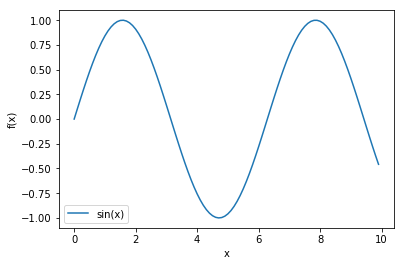

In [10]:
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y = np.sin(x)

plt.plot(x,y,label="sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

C'est bien plus facile que les listes, non ?



## Des listes commes les autres :

Les `ndarray` sont des listes comme les autres. Vous pouvez utiliser `for` , la conpréhension de liste et récupérer un élement $n$ avec `[n]` :

In [51]:
nb = np.arange(0,10,1)
for i in nb :
    print(i)

print("La valeur en 1 :",nb[1])

toto = [i*22 for i in nb]
print(toto)

0
1
2
3
4
5
6
7
8
9
La valeur en 1 : 1
[0, 22, 44, 66, 88, 110, 132, 154, 176, 198]


## Sélections par masque :

On peut facilement faire des sélections en appliquant un mask au `nbarray`. 

Le plus simple est de voir un exemple. Imaginon que je souhaite dans l'exemple précédent sélectionner les points pour lesquels $sin(x)>0$. Nous allons créer un masque de `bool` qui vaut 1 lorsque $sin(x)>0$ et 0 sinon :

In [12]:
z = (y>0)
print(z)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False]


Pour appliquer notre masque `z` à `y`, il suffit alors de l'indiquer entre [] comme ceci :

In [13]:
print(y[z])

[0.09983342 0.19866933 0.29552021 0.38941834 0.47942554 0.56464247
 0.64421769 0.71735609 0.78332691 0.84147098 0.89120736 0.93203909
 0.96355819 0.98544973 0.99749499 0.9995736  0.99166481 0.97384763
 0.94630009 0.90929743 0.86320937 0.8084964  0.74570521 0.67546318
 0.59847214 0.51550137 0.42737988 0.33498815 0.23924933 0.14112001
 0.04158066 0.0168139  0.1165492  0.21511999 0.31154136 0.40484992
 0.49411335 0.57843976 0.6569866  0.72896904 0.79366786 0.85043662
 0.8987081  0.93799998 0.96791967 0.98816823 0.99854335 0.99894134
 0.98935825 0.96988981 0.94073056 0.90217183 0.85459891 0.79848711
 0.7343971  0.66296923 0.58491719 0.50102086 0.41211849 0.31909836
 0.22288991 0.12445442 0.02477543]


On peut s'en servir même dans les plots :

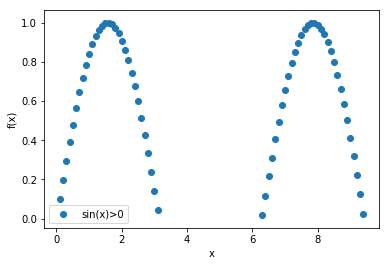

In [16]:
plt.scatter(x[z],y[z],label="sin(x)>0")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## Exercice 1 : échauffement

Créer un `ndarray` d'entiers allant de 0 à 20, remplacer tous les nombres pairs par des -1.

## Exercice 2 : Tracer des math

Utiliser *matplotlib* pour tracer sur un seul graphique la fonction $f(x) = e^{−x/10} \sin{(\pi x)}$ et $g(x) = x\,e^{−x/3}$ sur l'intervalle $[0, 10]$. 

Ajouter les noms des abscisses et ordonnées ainsi que la légende des courbes. 

Sauvegarder le graphique en png. A vous de chercher comment (*google* vient m'aider).

## Exercice 3 : Cardioïde

La fonction paramétrique d'un limaçon est donnée par :
<div align="center">  $r = r_0 + \cos (\theta)$ </div>
<div align="center">  $x = r \cos (\theta)$ </div>
<div align="center">  $y = r \sin (\theta)$ </div>

Affichier cette fonction pour $r_0=0.8$, $r_0=1$ et $r_0=1.2$. Laquelle de ces courbes s'appelle un cardioïde ? 

*Ajuster bien le nombre de points pour que ces courbes soient lisses.*